<a href="https://www.kaggle.com/code/tusharaggarwal27/which-debts-are-worth-the-bank-s-effort?scriptVersionId=115494538" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:180%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           🏦💵Which Debts Are Worth the Bank's Effort?🏧💱
            
</p>
<style>
        h1{text-align: center;}
 </style>  
    
</div>

<p style="font-family:cursive; font-size:25px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing on other platforms.</p>


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;font-size:23px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:23px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>Regression discontinuity: banking recovery</b>
    
</div>
<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    <b>Some things to note:</b>
    <br><br>After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed.
    <br><br>
    In this project, we'll look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for us is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.
    <br></br>
    Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.
</div>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Importing the required Libraries

 

    
   </p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Reading/Importing the data from my dataset collection,
    <br>
<a href="https://www.kaggle.com/datasets/tusharaggarwal27/bank-recovery-data" target="_blank">Click here!</a>
 

    
   </p>

In [2]:
bank_data = pd.read_csv("/kaggle/input/bank-recovery-data/bank_recovery_data.csv")

In [3]:
#Basic df checking
bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [4]:
#Checking for NaN
bank_data.isnull().sum().sort_values()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [5]:
#Checking info(metadata) for df
bank_data.info()
#Note: Column "sex"& "recovery_strategy" can be converted here with pd.get_dummies() into binary for ML models 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
#Checking basic Statistics of data with all columns
bank_data.describe(include='all') #ignore NaN for Column "sex"& "recovery_strategy" as currently srtings(object)data
#just for unique value is used describe(include='all'), other method can be to use .unique()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
count,1882.000000,1882.000000,1882.000000,1882,1882.000000,1882
unique,NaN,NaN,NaN,5,NaN,2
top,NaN,NaN,NaN,Level 1 Recovery,NaN,Male
freq,NaN,NaN,NaN,670,NaN,973
mean,1035.596174,2759.967588,4000.967837,NaN,39.650372,NaN
std,591.458429,2019.826565,4576.506350,NaN,15.453072,NaN
min,6.000000,194.000000,200.425000,NaN,18.000000,NaN
25%,534.250000,1261.250000,1045.190300,NaN,28.000000,NaN
50%,1029.500000,2062.000000,2115.446373,NaN,35.000000,NaN
75%,1551.750000,3569.500000,5417.237207,NaN,50.000000,NaN


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Graphical exploratory data analysis</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">
&#8226;The bank has implemented different recovery strategies at different thresholds ($1000, $2000, $3000 and $5000) where the greater the Expected Recovery Amount, the more effort the bank puts into contacting the customer. Zeroing in on the first transition (between Level 0 and Level 1) means we are focused on the population with Expected Recovery Amounts between $0 and $2000 where the transition between Levels occurred at $1000.</p>

 <p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">We know that the customers in Level 1(expected recovery amounts between $1001 and $2000) received more attention from the bank and, by definition, they had higher Expected Recovery Amounts than the customers in Level 0 (between $1 and $1000).
    <br><br>Here's a quick summary of the Levels and thresholds again:
<br>&#8226;Level 0: Expected recovery amounts >$0 and <=$1000
<br>&#8226;Level 1: Expected recovery amounts >$1000 and <=$2000
<br>&#8226;The threshold of $1000 separates Level 0 from Level 1

</p>

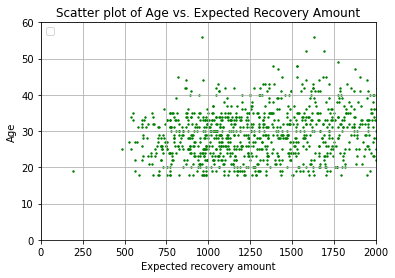

In [7]:
# Scatter plot of Age vs. Expected Recovery Amount

plt.scatter(x=bank_data['expected_recovery_amount'], y=bank_data['age'], c="g", s=2)
plt.grid()
plt.xlim(0,2000)
plt.ylim(0,60)
plt.title("Scatter plot of Age vs. Expected Recovery Amount")
plt.xlabel("Expected recovery amount")
plt.ylabel("Age")
plt.legend(loc=2)
plt.show()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Statistical test: age vs. expected recovery amount</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">&#8226; We want to convince ourselves that variables such as age and sex are similar above and below the(1000)Expected Recovery Amount threshold. This is important because we want to be able to conclude that differences in the actual recovery amount are due to the higher Recovery Strategy and not due to some other difference like age or sex.
<br><br> &#8226; The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around 1000. We will now do statistical analysis examining the average age of the customers just above and just below the threshold. We can start by exploring the range from 900 to 1100.
<br><br> &#8226; For determining if there is a difference in the ages just above and just below the threshold, we will use the Kruskal-Wallis test, a statistical test that makes no distributional assumptions.
</p>

In [8]:
# Computing average age just below and above the threshold
era_900_1100 = bank_data.loc[(bank_data['expected_recovery_amount']<1100) & 
                      (bank_data['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test 
Level_0_age = era_900_1100.loc[bank_data['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[bank_data['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age,Level_1_age) 

#Resulting p-value = . 0629, it is not significan

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Statistical test: sex vs. expected recovery amount</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">&#8226; We have seen that there is no major jump in the average customer age just above and just below the 1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.
    <br><br>
    &#8226; We want to also test that the percentage of customers that are male does not jump across the 1000 threshold. We can start by exploring the range of 900 to 1100 and later adjust this range.
    <br><br>
    &#8226; We can examine this question statistically by developing cross-tabs as well as doing chi-square tests of the percentage of customers that are male vs. female.
    
</p>

In [9]:
# Number of customers in each category
crosstab = pd.crosstab(bank_data.loc[(bank_data['expected_recovery_amount']<1100) & 
                              (bank_data['expected_recovery_amount']>=900)]['recovery_strategy'], 
                       bank_data['sex'])

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(chi2_stat, p_val, dof, ex )


0.3796422112341753 0.5377947810444592 1 [[34.53005464 54.46994536]
 [36.46994536 57.53005464]]


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Exploratory graphical analysis: recovery amount</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">&#8226; We are now reasonably confident that customers just above and just below the 1000 threshold are, on average, similar in their average age and the percentage that are male.
<br><br>&#8226; It is now time to focus on the key outcome of interest, the actual recovery amount.
    <br><br>&#8226; A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (X) versus Actual Recovery Amount (Y) for Expected Recovery Amounts between 900 to 1100. This range covers Levels 0 and 1. A key question is whether or not we see a discontinuity (jump) around the 1000 threshold.
</p>

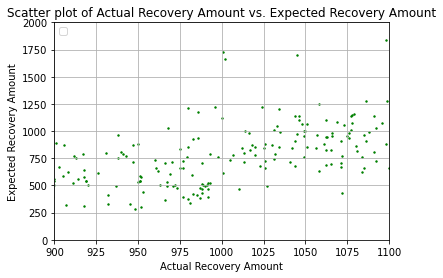

In [10]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount 
plt.grid()
plt.scatter(x=bank_data['expected_recovery_amount'], y=bank_data['actual_recovery_amount'], c="g", s=2)
plt.title("Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount")
plt.xlim(900,1100)
plt.ylim(0,2000)
plt.xlabel("Actual Recovery Amount")
plt.ylabel("Expected Recovery Amount")
plt.legend(loc=2)
plt.show()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Statistical analysis: recovery amount</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">&#8226; As we did with age, we can perform statistical tests to see if the actual recovery amount has a discontinuity above the 1000 threshold. We are going to do this for two different windows of the expected recovery amount 900 to 1100 and for a narrow range of 950 to 1050 to see if our results are consistent.
<br><br>&#8226; It is now time to focus on the key outcome of interest, the actual recovery amount.
    <br><br>&#8226; We will first compute the average actual recovery amount for those customers just below and just above the threshold using a range from 900 to 1100. Then we will perform a Kruskal-Wallis test to see if the actual recovery amounts are different just above and just below the threshold. Once we do that, we will repeat these steps for a smaller window of 950 to 1050.
</p>

In [11]:
#Computing average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

#Performing Kruskal-Wallis test
Level_0_actual = era_900_1100.loc[bank_data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = era_900_1100.loc[bank_data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual) 

#Repeating for a smaller range of $950 to $1050
era_950_1050 = bank_data.loc[(bank_data['expected_recovery_amount']<1050) & 
                      (bank_data['expected_recovery_amount']>=950)]
Level_0_actual_1 = era_950_1050.loc[bank_data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual_1 = era_950_1050.loc[bank_data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual_1, Level_1_actual_1)

#For both p_value is above 3.805 & 6.177

KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Regression modeling: no threshold</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">&#8226; We now want to take a regression-based approach to estimate the program impact at the 1000 threshold using data that is just above and below the threshold.
<br><br>&#8226; We will build two models. The first model does not have a threshold while the second will include a threshold.
    <br><br>&#8226; The first model predicts the actual recovery amount (dependent variable) as a function of the expected recovery amount (independent variable). We expect that there will be a strong positive relationship between these two variables.
    <br><br>&#8226; We will examine the adjusted R-squared to see the percent of variance explained by the model. In this model, we are not representing the threshold but simply seeing how the variable used for assigning the customers (expected recovery amount) relates to the outcome variable (actual recovery amount).
</p>

In [12]:
# Defining X and y
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Building linear regression model
model_1 = sm.OLS(y, X).fit()#Ordinary Least Sqaure
predictions = model_1.predict(X)

# Printing out the model summary statistics
print(model_1.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Wed, 04 Jan 2023   Prob (F-statistic):           1.56e-13
Time:                            16:29:54   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Regression modeling: adding true threshold</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">&#8226; From the first model, we see that the expected recovery amount's regression coefficient is statistically significant.
<br><br>&#8226; The second model adds an indicator of the true threshold to the model (in this case at 1000).
    <br><br>&#8226; We will create an indicator variable (either a 0 or a 1) that represents whether or not the expected recovery amount was greater than 1000. When we add the true threshold to the model, the regression coefficient for the true threshold represents the additional amount recovered due to the higher recovery strategy. That is to say, the regression coefficient for the true threshold measures the size of the discontinuity for customers just above and just below the threshold.
    <br><br>&#8226; If the higher recovery strategy helped recovery more money, then the regression coefficient of the true threshold will be greater than zero. If the higher recovery strategy did not help recovery more money, then the regression coefficient will not be statistically significant.
</p>

In [13]:
# Creating indicator (0 or 1) for expected recovery amount >= $1000
bank_data['indicator_1000'] = np.where(bank_data['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = bank_data.loc[(bank_data['expected_recovery_amount']<1100) & 
                      (bank_data['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model_2 = sm.OLS(y,X).fit()

# Print the model summary
print(model_2.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Wed, 04 Jan 2023   Prob (F-statistic):           1.83e-15
Time:                            16:29:54   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Regression modeling: adjusting the window</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">&#8226; The regression coefficient for the true threshold was statistically significant with an estimated impact of around 278. This is much larger than the 50 per customer needed to run this higher recovery strategy.
    <br><br>&#8226; Before showing this to our manager, we want to convince ourselves that this result wasn't due to choosing an expected recovery amount window of 900 to 1100. Let's repeat this analysis for the window from $950 to $1050 to see if we get similar results.
    <br><br>&#8226; The answer? Whether we use a wide (900 to 1100) or narrower window ($950 to $1050), the incremental recovery amount at the higher recovery strategy is much greater than the 50 per customer it costs for the higher recovery strategy. So we conclude that the higher recovery strategy is worth the extra cost of 50 per customer.
</p>

In [14]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = bank_data.loc[(bank_data['expected_recovery_amount']<1050) & 
                      (bank_data['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model_3 = sm.OLS(y,X).fit()

# Print the model summary
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Wed, 04 Jan 2023   Prob (F-statistic):           1.12e-07
Time:                            16:29:54   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>Therefor we are now confident that The regression coefficient for the 950_1050 threshold was statistically significant with an estimated impact</b>
</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px"><b>For model comparison and hyperparameter tunning , keep updated with this notebook</b>
</p>